In [ ]:
#Naive Bayes: P(y|x) = P(x|y)P(y)/P(x)
#y-label:spam or ham, x-feature in this case word or frequency of words
#LH:Probability of spam given words = RH: Occurence of words if spam * How often spam occurs/ How often words occur(in general)
#P(y) called a prior
#P(x|y) is Likelihood in Naive assumes conditional independence -Each word is assumed independent of others

In [ ]:
#Tokenize words in a text: make into a vector 1 if present 0 if not
#P(x) is called evidence=Sum P(x|y)*P(y) probability of seeing a feature independent of class/label, not computed though
#only want to see argmax of y, so just compare P(x|y)P(y), THIS IS COMPUTED for each class (spam v ham) and return the class with the higher value

In [ ]:
#NB from fruit example: we have feature space X (e.g. colour, length, texture,..) form open sets a cell where collection features represent a class.
#This is a height function above the feature space, hills=probability distirubtion of features for a class & we pick the highest hill=class
#Decision boundary is where h=same on hills but move onto a different class
#There exists a statistical manifold M separate of X on which point=distribution and there is a mapping of a region=cell to a point=class on statistical manifold
#exterior derivative of 2 height functions where they meet when height is same gives us: distance across saddle and slopes of diff hills

In [ ]:
#Toy Dataset:Fruit to start
import numpy as np
import pandas as pd

# Synthetic fruit data
data = pd.DataFrame({
    'color_score':  [0.85, 0.9, 0.92, 0.1, 0.2, 0.15, 0.6, 0.58, 0.65],
    'length':       [7.0, 7.2, 6.8, 12.0, 11.8, 12.1, 10.0, 10.3, 9.8],
    'weight':       [150, 160, 145, 120, 130, 125, 200, 210, 190],
    'label':        ['apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'pineapple', 'pineapple', 'pineapple']
})


In [ ]:
#Preprocessing + split data (no validation yet)
from sklearn.model_selection import train_test_split

# Separate features and labels
X = data[['color_score', 'length']]
y = data['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(y_train)

   color_score  length
0         0.85     7.0
8         0.65     9.8
2         0.92     6.8
4         0.20    11.8
3         0.10    12.0
6         0.60    10.0
0        apple
8    pineapple
2        apple
4       banana
3       banana
6    pineapple
Name: label, dtype: object


In [ ]:
class_stats = {} #empty dict

for label in y_train.unique(): #get 3 unique classes
    X_label = X_train[y_train==label] #pd and numpy overload so == applies elementwise y_train = current label returns Boolean mask
    print(X_label)
    #When True for say apple then select rows for the corresponding y label
    mu = X_label.mean() #mean of every feature in 1 class: color score + length of 4 apples for ex
    var = X_label.var()
    prior = len(X_label) / len(X_train) #proporation of data belonging to a class e.g. P(Apple)=2/6
    #this is about distrubtion of labels, ive seen x fruits in life and of them n are apples

    class_stats[label] = { #label becomes a key
        'mean': mu,
        'var': var,
        'prior': prior}

#make readable
from pprint import pprint

#pprint(class_stats) #this learns a different distribution per feature per class, mean and var of colour score, mean and var of length and then prior of all apples e.g.

   color_score  length
0         0.85     7.0
2         0.92     6.8
   color_score  length
8         0.65     9.8
6         0.60    10.0
   color_score  length
4          0.2    11.8
3          0.1    12.0


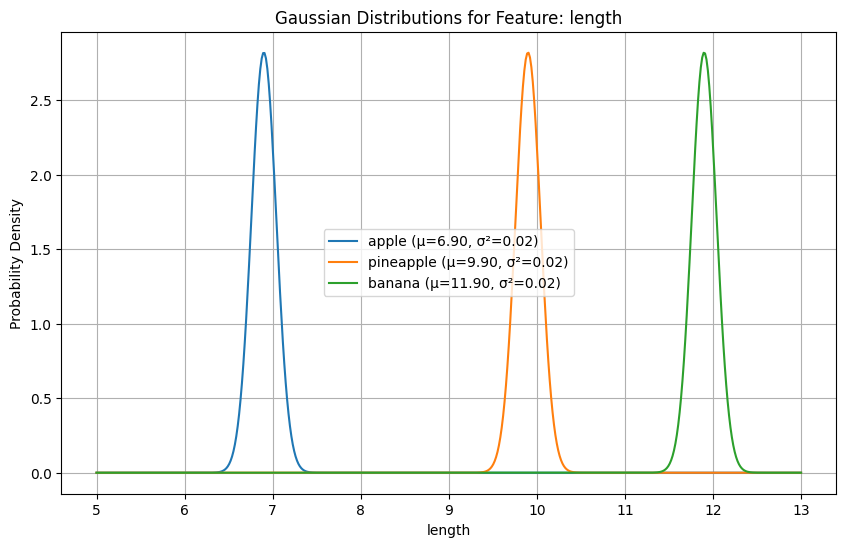

In [ ]:
#Assumed all features in all classes are Gaussian Distributions and coded mean and variance as such

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #import the normal (Gaussian) Distribution

# Pick one feature to visualize, e.g., "length"
feature = "length"
x_range = np.linspace(5, 13, 500)  # x-axis for plot, (start, stop, # points) more points = smoother

plt.figure(figsize=(10, 6))

# Loop through each class
for label, stats in class_stats.items(): #class_stats is dict with gauss dist of features per class
# for key, value in my_dict.items(): variation of this
    mu = stats['mean'][feature] #for feature (earlier defined length) for each fruit,  stats['mean'] pulls mean for that fruit
    sigma = np.sqrt(stats['var'][feature]) #stats is word instead of value

    # Gaussian curve for this class
    y = norm.pdf(x_range, mu, sigma)
    plt.plot(x_range, y, label=f"{label} (μ={mu:.2f}, σ²={sigma**2:.2f})") #formatted string where {} replace with value inside expression, .2f rounds to 2d.p

plt.title(f"Gaussian Distributions for Feature: {feature}")
plt.xlabel(feature)
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()



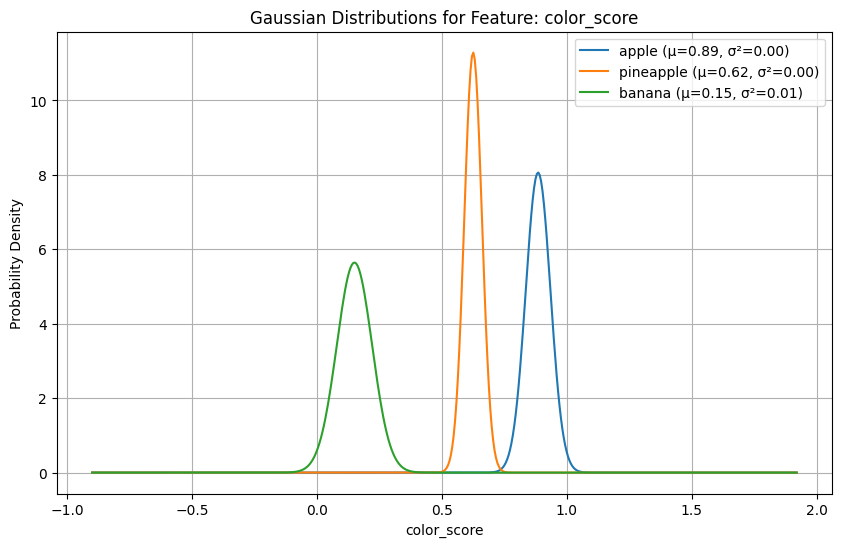

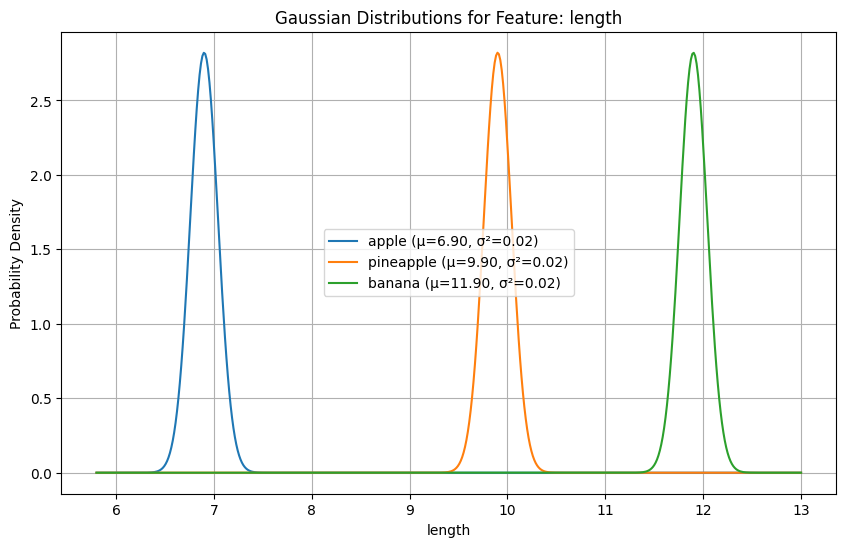

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Loop over each feature (e.g. 'color_score', 'length', ...)
for feature in X_train.columns:
    x_min = X_train[feature].min() - 1  # slightly below min
    x_max = X_train[feature].max() + 1  # slightly above max
 #instead of saying feature ='lenght'
    x_range = np.linspace(x_min, x_max, 500)
#everything after is same

    plt.figure(figsize=(10, 6))

    for label, stats in class_stats.items():
        mu = stats['mean'][feature]
        sigma = np.sqrt(stats['var'][feature])

        y = norm.pdf(x_range, mu, sigma)
        plt.plot(x_range, y, label=f"{label} (μ={mu:.2f}, σ²={sigma**2:.2f})")

    plt.title(f"Gaussian Distributions for Feature: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#Compute likelihood fxn= P(xi|c)= probability of observing feature given class: 1/sqrt2pi*sigma**2 * e^ -(xi -mean)**2/2sigma**2
import numpy as np

def gaussian_likelihood(x_i, mean, var):
    # standard deviation
    sigma = np.sqrt(var)
    # calculate exponent term
    exponent = np.exp(- ((x_i - mean) ** 2) / (2 * var))
    # calculate full Gaussian PDF
    likelihood = (1 / (np.sqrt(2 * np.pi) * sigma)) * exponent
    return likelihood
#Likelihood for a specific feature, this is just implementing the math and i dont really understand the formula behind it tbh

In [ ]:
#Posterior: P(c|x) = Product of all P(xi|c) * P(c)
def class_posterior(x, class_stats, label):
    prior = class_stats[label]['prior']
    mean = class_stats[label]['mean']
    var = class_stats[label]['var']

    # Start with prior
    posterior = prior

    # Multiply likelihoods for each feature
    for feature in x.index:
        likelihood = gaussian_likelihood(x[feature], mean[feature], var[feature])
        posterior *= likelihood

    return posterior

#does prior(0.33) * P(length|fruit) * P(colour|fruit) for all fruits

In [ ]:
def all_class_posteriors(x, class_stats):
    posteriors = {}
    for label in class_stats:
        posteriors[label] = class_posterior(x, class_stats, label)
    return posteriors

In [ ]:
def predict(x, class_stats):
    best_label = None
    best_posterior = -1  # or float('-inf') for numeric safety

    for label in class_stats:
        posterior = class_posterior(x, class_stats, label)
        if posterior > best_posterior:
            best_posterior = posterior
            best_label = label

    return best_label


In [ ]:
sample = X_test.iloc[0] #integer location
true_label = y_test.iloc[0]

predicted_label = predict(sample, class_stats)

print(f"Predicted: {predicted_label}, Actual: {true_label}")


Predicted: pineapple, Actual: pineapple


In [ ]:
correct = 0

for i in range(len(X_test)):
    x = X_test.iloc[i]
    true_label = y_test.iloc[i]
    predicted_label = predict(x, class_stats)

    if predicted_label == true_label:
        correct += 1

accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


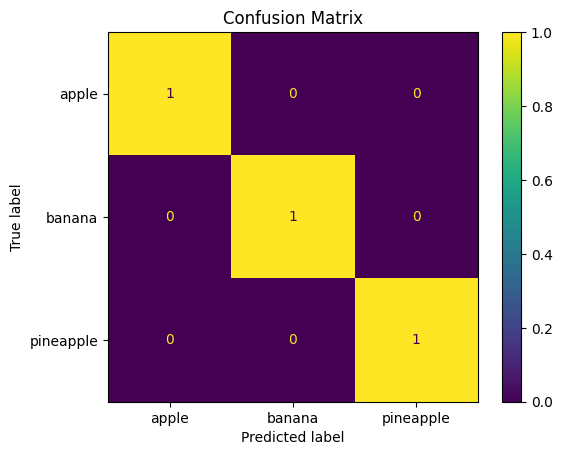

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = [predict(X_test.iloc[i], class_stats) for i in range(len(X_test))]
cm = confusion_matrix(y_test, y_pred, labels=["apple", "banana", "pineapple"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["apple", "banana", "pineapple"])
disp.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


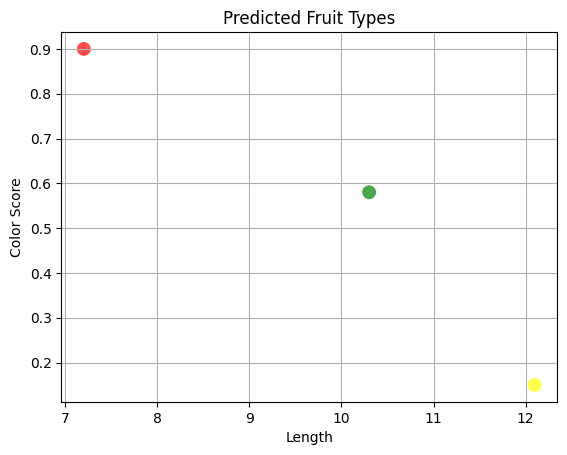

In [ ]:
import matplotlib.pyplot as plt

colors = {'apple': 'red', 'banana': 'yellow', 'pineapple': 'green'}
for i in range(len(X_test)):
    x = X_test.iloc[i]
    pred = predict(x, class_stats)
    true = y_test.iloc[i]
    plt.scatter(x['length'], x['color_score'],
                color=colors[pred],
                edgecolor='black' if pred != true else 'none',
                label=pred if i == 0 else "", s=100, alpha=0.7)

plt.xlabel("Length")
plt.ylabel("Color Score")
plt.title("Predicted Fruit Types")
plt.grid(True)
plt.show()


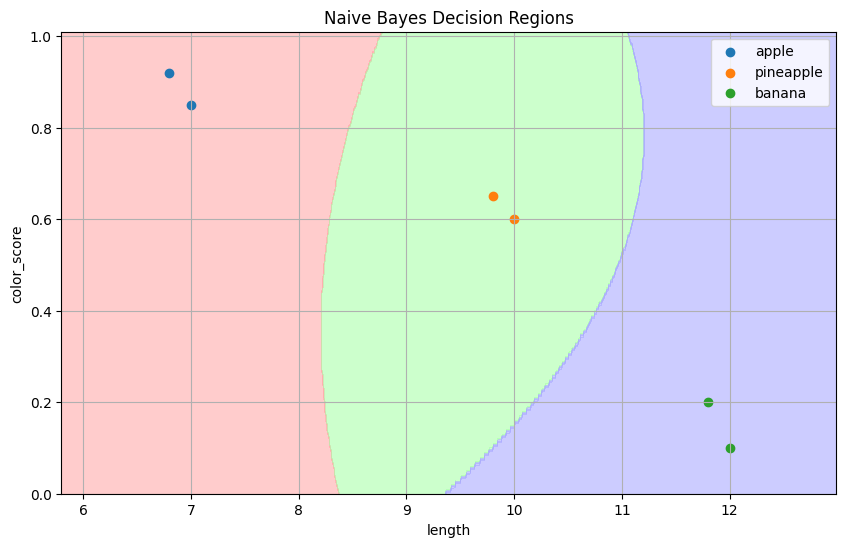

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #create custom color maps for discrete regions

# Use only two features for 2D visualization
features = ['length', 'color_score']
X_train = X_train[features]  # ensure only 2D

# Create mesh grid over feature space
h = .01 #step size for the grid, smaller is more resolution and smoother more computation
x_min, x_max = X_train[features[0]].min() - 1, X_train[features[0]].max() + 1
y_min, y_max = X_train[features[1]].min() - 0.1, X_train[features[1]].max() + 0.1
#min and max for features-length and y for-colour, then do padding with -1 and +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) #creates grid, xx is x coordinate and yy is y coordinate
#arange works like range for float for start, stop, step

# Predict class for each point in the grid
Z = [] #holds predicted class for each xx, yy

for i in range(xx.shape[0]): #loops over the rows as xx.shape[0] is the num of rows in the grid along the yaxis
    row = [] # Temporary list to store predicted classes for this row of points.

    for j in range(xx.shape[1]): #loop over the columns xx.shape[1] along the yaxis

        sample = pd.Series({      #for each grid point(i,j) we create a fake sample with 2 features
                                  #pd.Series creates a row
            features[0]: xx[i, j], #length
            features[1]: yy[i, j]  #colour
        })
        #this covers the entire grid with fake points essentially
        pred = predict(sample, class_stats) #this is naive bayes to classifiy each point

        row.append(pred) #add predicted sample as a row

    Z.append(row) # After looping through a full row of grid points, add the row to Z

Z = np.array(Z)

# Map class labels to integers for coloring
label_to_color = {label: idx for idx, label in enumerate(class_stats.keys())} #matplot needs integers mapped from strings like apple converts to 0
Z_mapped = np.vectorize(label_to_color.get)(Z) #applies the mapping and now is 2D array with 0,1,2

# Plot decision regions
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # diff colours for the nums (classses)
plt.contourf(xx, yy, Z_mapped, cmap=cmap_light, alpha=0.6) #draws filled contours based on xx, yy all points as well as Z_mapped(predictions)

# Overlay training points-> this is real training data
for label in class_stats:
    plt.scatter(
        X_train[y_train == label][features[0]],
        X_train[y_train == label][features[1]],
        label=label
    )

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Naive Bayes Decision Regions")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Each region=Open Cell in Topology=CW Complex

#IF base space then above each point attach a fiber=prob distribution over all classes, which is a point on a probability simplex this is a triangle with point of p1,p2,p3
#The total space is all the probabilities above all points
#NB is a section of this bundle,picks the max (one class) of every point in the base space
#Decision region is a pullback the inverse image (or preimage) of the classifier section